## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import os
import random
import numpy as np

# Study data files
mouse_metadata_path = os.path.join('data','Mouse_metadata.csv')
study_results_path = os.path.join('data','Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View the mouse data and the study results

mouse_metadata.columns
study_results.columns

# study_results

# Combine the data into a single dataset
metadata_studyresults = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
print(f"mouse_metadata Data Shape: {mouse_metadata.shape}")
print(f"study_results Data Shape: {study_results.shape}")
print(f"metadata_studyresults Data shape {metadata_studyresults.shape}")
mouse_metadata




mouse_metadata Data Shape: (249, 5)
study_results Data Shape: (1893, 4)
metadata_studyresults Data shape (1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
print(f"metadata_studyresults Data index {metadata_studyresults.columns}")
print(f"metadata_studyresults Data count {metadata_studyresults.count()}")
metadata_studyresults

metadata_studyresults Data index Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')
metadata_studyresults Data count Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
# metadata_studyresults['Mouse ID'].value_counts()
metadata_studyresults['Mouse ID'].nunique()

249

In [6]:
# Checking the number of mice.
metadata_studyresults.count()
# metadata_studyresults['Timepoint'].unique()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
subset_mouseID = metadata_studyresults.loc[metadata_studyresults.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

subset_mouseID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
DupMice = metadata_studyresults.loc[metadata_studyresults['Mouse ID'] == 'g989']
DupMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_Mice = metadata_studyresults[metadata_studyresults['Mouse ID'] == 'g989'].index
metadata_studyresults.drop(dup_Mice, inplace = True)


In [10]:
# Checking the number of mice in the clean DataFrame.
metadata_studyresults['Mouse ID'].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Get a list of regimen
Regimen_List = metadata_studyresults['Drug Regimen'].unique()
Regimen_List
Regimen_Dict = {}
TumorVol_Mean_Dict = {}
TumorVol_Median_Dict = {}
TumorVol_Mode_Dict = {}
TumorVol_Var_Dict = {}
TumorVol_Std_Dict = {}
TumorVol_SEM_Dict = {}

for i in Regimen_List:
    Regimen_Dict[i] = metadata_studyresults.loc[metadata_studyresults['Drug Regimen']==i, 'Tumor Volume (mm3)']
for i in Regimen_Dict:
    TumorVol_Mean_Dict[i] = np.mean(Regimen_Dict[i])
    TumorVol_Median_Dict[i] = np.median(Regimen_Dict[i])
    TumorVol_Mode_Dict[i] = sts.mode(Regimen_Dict[i])
    TumorVol_Var_Dict[i] = np.var(Regimen_Dict[i])
    TumorVol_Std_Dict[i] = np.std(Regimen_Dict[i])
    TumorVol_SEM_Dict[i] = sem(Regimen_Dict[i])
    
    
summary_stats_dict= {"MEAN": TumorVol_Mean_Dict, "MEDIAN": TumorVol_Median_Dict, "VARIANCE": TumorVol_Var_Dict, 
                     "STANDARD DEVIATION": TumorVol_Std_Dict, "SEM": TumorVol_SEM_Dict, "MODE": TumorVol_Mode_Dict}

summary_stats_dict_df = pd.DataFrame(summary_stats_dict)
summary_stats_dict_df


,MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,SEM,MODE
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955,"([45.0], [25])"
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346,"([45.0], [25])"
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236,"([45.0], [25])"
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331,"([45.0], [25])"
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821,"([45.0], [25])"
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111,"([45.0], [24])"
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398,"([45.0], [25])"
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860,"([45.0], [25])"
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332,"([45.0], [24])"
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466,"([45.0], [25])"


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

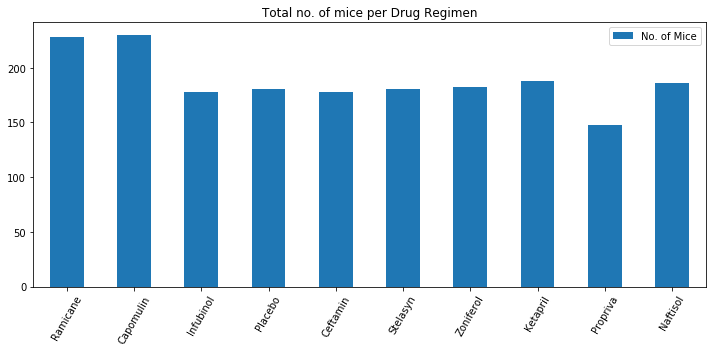

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Create x-axis
Regimen_List = metadata_studyresults['Drug Regimen'].unique()
regimenNo = np.array(range(len(Regimen_List)))

# Create needed lists
Regimen_MouseID_Dict = {}
Mice = []

for drug in Regimen_List:
    Regimen_MouseID_Dict[drug] = metadata_studyresults.loc[metadata_studyresults['Drug Regimen']==drug, 'Mouse ID']
    Mice.append(Regimen_MouseID_Dict[drug].count())
# -----------------------------------------------------------------------
# Create a df
mice_per_drug_dict = {"Drug_Regimen": Regimen_List, "No. of Mice": Mice}
mice_per_drug_df = pd.DataFrame(mice_per_drug_dict)
mice_per_drug_df

# Create a plot
mice_per_drug_df.plot(kind="bar", figsize=(10,5))
plt.title("Total no. of mice per Drug Regimen")
plt.xticks(regimenNo, Regimen_List,rotation = 60)
plt.tight_layout()
plt.show()

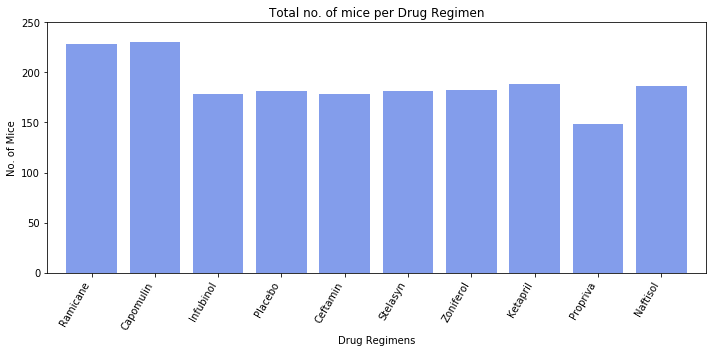

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create x-axis
Regimen_List = metadata_studyresults['Drug Regimen'].unique()

# Create y-axis
Regimen_MouseID_Dict = {}
Mice = []

for drug in Regimen_List:
    Regimen_MouseID_Dict[drug] = metadata_studyresults.loc[metadata_studyresults['Drug Regimen']==drug, 'Mouse ID']
    Mice.append(Regimen_MouseID_Dict[drug].count())

# -----------------------------------------------------------------------
# Create Plot
plt.figure(figsize=(10,5))
plt.bar(x=Regimen_List, height=Mice, color='royalblue', alpha=0.65, align='center')
plt.xticks(regimenNo, Regimen_List,rotation = 60,ha='right')
plt.title("Total no. of mice per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("No. of Mice")
plt.xlim(-0.7, len(regimenNo)-0.3)
plt.ylim(0, max(Mice)+20)
plt.tight_layout()

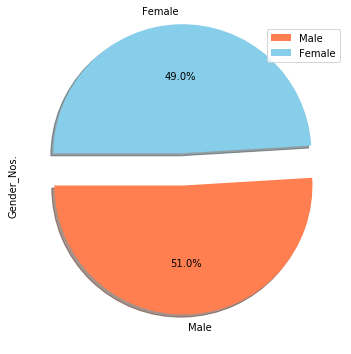

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create needed data sets
Gender_List = metadata_studyresults['Sex'].value_counts()
Gender_Type = metadata_studyresults['Sex'].unique()

# Create Plot
# Create a df
Gender_dict = {"Gender_Type": Gender_Type, "Gender_Nos.": Gender_List}
Gender_df = pd.DataFrame(Gender_dict)
Gender_df

# Create a plot

# The colors of each section of the pie chart
colors = ["coral", "skyblue"]

# Tells matplotlib to seperate the "Smurfs" section from the others
explode = [0, 0.25]

plot = Gender_df.plot.pie(y="Gender_Nos.", figsize=(5, 5), autopct="%1.1f%%", shadow=True, startangle=180, explode=explode, colors=colors)
plt.tight_layout()
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create needed data sets
Gender_List = metadata_studyresults['Sex'].value_counts()
Gender_Type = metadata_studyresults['Sex'].unique()

# Labels for the sections of our pie chart
labels = [Gender_Type[0], Gender_Type[1]]

# The values of each section of the pie chart
sizes = [Gender_List.Male, Gender_List.Female]

# The colors of each section of the pie chart
colors = ["coral", "skyblue"]

# Tells matplotlib to seperate the "Smurfs" section from the others
explode = [0, 0.25]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180, explode=explode)


## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Regimen1_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
DrugRegimen_Dict = {"MouseID":[],"Drug":[],"Tumor Volume":[]}
TumorVol_Dict = {}
TumorVol_List = []
Timepoint_Dict = {}
Timepoint_List = []
MouseID_Dict = {}
MouseID_List = []

# ------------------------------------------------------------------------------------------------------------
# Start by getting the last (greatest) timepoint for each mouse

# Get a subset dataframe with only data from the four treatment regimens listed
for drug in Regimen1_List:
    Regimen_4_BoxPlot = metadata_studyresults.loc[(metadata_studyresults['Drug Regimen']=="Capomulin") |
                                                 (metadata_studyresults['Drug Regimen']=="Ramicane") |
                                                 (metadata_studyresults['Drug Regimen']=="Infubinol") |
                                                 (metadata_studyresults['Drug Regimen']=="Ceftamin")]
Regimen_4_BoxPlot['Mouse ID'].nunique()
Regimen_4_BoxPlot

# Get the max timepoint for each Mouse ID
maxTimept_df = Regimen_4_BoxPlot.groupby("Mouse ID")['Timepoint'].max()
print(maxTimept_df.shape)
print(maxTimept_df.count())
# print(maxTimept_df['Timepoint'].max)
# print(maxTimept_df['Timepoint'].min)
maxTimept_df

metadata_studyresults

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MicemaxTimept = pd.merge(maxTimept_df, metadata_studyresults, how='left', on=['Mouse ID'], suffixes=('_max', '_all'))
MicemaxTimept_df = MicemaxTimept.loc[:,['Mouse ID', 'Timepoint_max', 'Timepoint_all', 'Drug Regimen', 'Tumor Volume (mm3)']]
# # FINAL_Boxplot_df = MicemaxTimept_df.loc[(MicemaxTimept_df ["Timepoint_max"]==["Timepoint_all"])]
print(MicemaxTimept_df.shape)
print(MicemaxTimept_df["Mouse ID"].nunique())
MicemaxTimept_df.head(50)

#OR-----------------

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# MicemaxTimept = pd.merge(maxTimept_df, study_results, how='left', on=['Mouse ID'], suffixes=('_max', '_all'))
# # MicemaxTimept_df = MicemaxTimept.loc[:,['Mouse ID', 'Timepoint_max', 'Timepoint_all', 'Tumor Volume (mm3)']]
# # FINAL_Boxplot_df = MicemaxTimept_df.loc[(MicemaxTimept_df ["Timepoint_max"]==["Timepoint_all"])]
# print(MicemaxTimept.shape)
# print(MicemaxTimept["Mouse ID"].nunique())
# MicemaxTimept

# ------------------------------------------------------------------------------------------------------------
# For_Boxplot_df = metadata_studyresults.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
# For_Boxplot_df
# Capomulin_df = For_Boxplot_df.loc[(For_Boxplot_df["Drug Regimen"]=="Capomulin")&(For_Boxplot_df["Timepoint"]==45)]
# Ramicane_df = For_Boxplot_df.loc[(For_Boxplot_df["Drug Regimen"]=="Ramicane")&(For_Boxplot_df["Timepoint"]==45)]
# Infubinol_df = For_Boxplot_df.loc[(For_Boxplot_df["Drug Regimen"]=="Infubinol")&(For_Boxplot_df["Timepoint"]==45)]
# Ceftamin_df = For_Boxplot_df.loc[(For_Boxplot_df["Drug Regimen"]=="Ceftamin")&(For_Boxplot_df["Timepoint"]==45)]

# Timepoint_df = metadata_studyresults.copy()
# # For_Boxplot_df = metadata_studyresults.loc[:, ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
# # For_Boxplot_df
# Capomulin_df = Timepoint_df.loc[Timepoint_df["Drug Regimen"]=="Capomulin"]
# # Capomulin_df["Mouse ID"].nunique()
# Capomulin_df2 = Capomulin_df.loc[lambda Capomulin_df: Capomulin_df['Timepoint'] == 45]
# Capomulin_df2["Mouse ID"].nunique()

# Ramicane_df = Timepoint_df.loc[Timepoint_df["Drug Regimen"]=="Ramicane"]
# # Ramicane_df["Mouse ID"].nunique()
# Ramicane_df2 = Ramicane_df.loc[lambda Ramicane_df: Ramicane_df['Timepoint'] == 45]
# Ramicane_df2["Mouse ID"].nunique()

# Infubinol_df = Timepoint_df.loc[Timepoint_df["Drug Regimen"]=="Infubinol"]
# # Infubinol_df["Mouse ID"].nunique()
# Infubinol_df2 = Infubinol_df.loc[lambda Infubinol_df: Infubinol_df['Timepoint'] == 30]
# Infubinol_df2["Mouse ID"].nunique()

# Ceftamin_df = Timepoint_df.loc[Timepoint_df["Drug Regimen"]=="Ceftamin"]
# # Ceftamin_df["Mouse ID"].nunique()
# Ceftamin_df2 = Ceftamin_df.loc[lambda Ceftamin_df: Ceftamin_df['Timepoint'] == 25]
# Ceftamin_df2


# # for drug in Regimen1_List:
# #     drug_df = For_Boxplot_df.loc[(For_Boxplot_df["Drug Regimen"]==drug)&(For_Boxplot_df["Timepoint"]==45)]
# # drug_df
# # ------------------------------------------------------------------------------------------------------------
# # for drug in Regimen1_List:
# #     DrugRegimen_Dict = metadata_studyresults.loc[(metadata_studyresults['Drug Regimen']==drug) & (metadata_studyresults['Timepoint']==45), 'Tumor Volume (mm3)']

# for drug in Regimen1_List:
#     MouseID_List = metadata_studyresults.loc[(metadata_studyresults['Drug Regimen']==drug), 'Mouse ID']
    
# # for mouse in MouseID_List:
# #     TumorVol_List.append(metadata_studyresults.loc[(metadata_studyresults['Mouse ID']==mouse), 'Tumor Volume (mm3)'])
# #     Timepoint_List.append(metadata_studyresults.loc[(metadata_studyresults['Mouse ID']==mouse), 'Timepoint'])
 
# for mouse in MouseID_List:
#     TumorVol_Dict.append(metadata_studyresults.loc[(metadata_studyresults['Mouse ID']==mouse), 'Tumor Volume (mm3)'])
#     Timepoint_Dict = metadata_studyresults.loc[(metadata_studyresults['Mouse ID']==mouse), 'Timepoint']
# # Timepoint_List
# TumorVol_Dict
# metadata_studyresults.head(50)
# # ------------------------------------------------------------------------------------------------------------
#     DrugRegimen_df = metadata_studyresults[metadata_studyresults.Mouse ID == mouse]
# indvMouse_df.head()
# Mouse_List = metadata_studyresults['Mouse ID'].unique()
# type(Mouse_List)
# # Start by getting the last (greatest) timepoint for each mouse
# for mouse in Mouse_List:
#     indvMouse_df = metadata_studyresults[metadata_studyresults.Mouse ID == mouse]
# indvMouse_df.head()    
# #     All_schs_Read70plus_df = school_and_student_data_complete[school_and_student_data_complete.reading_score>=70]
# Timepoint_df = metadata_studyresults.copy()
# # Timepoint_df = Timepoint_df.set_index("Mouse ID")
# # Timepoint_gb = Timepoint_df.groupby(["Mouse ID"]).max()
# # Timepoint_gb.head(50)
# Timepoint_df.loc[lambda Timepoint_df: Timepoint_df['Timepoint'] == 40]


# # --------------------------------------------------------------------------------------
# # Create necessary lists/dicts
# maxTimepoint_Dict = {}
# maxTimepoint = []
# totalNoMice = []

# for mouse in Mouse_List:
#     maxTimepoint.append(metadata_studyresults.Timepoint.max())
# #     totalNoMice.append(Regimen_MouseID_Dict[drug].unique())
# maxTimepoint
# # --------------------------------------------------------------------------------------
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint


(100,)
100
(814, 5)
100


,Mouse ID,Timepoint_max,Timepoint_all,Drug Regimen,Tumor Volume (mm3)
0,a203,45,0,Infubinol,45.000000
1,a203,45,5,Infubinol,48.508468
2,a203,45,10,Infubinol,51.852437
3,a203,45,15,Infubinol,52.777870
4,a203,45,20,Infubinol,55.173336
5,a203,45,25,Infubinol,56.793208
6,a203,45,30,Infubinol,59.523197
7,a203,45,35,Infubinol,61.931650
8,a203,45,40,Infubinol,63.593490
9,a203,45,45,Infubinol,67.973419


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen2_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
CapomulinTumorVol_List = []
RamicaneTumorVol_List = []
InfubinolTumorVol_List = []
CeftaminTumorVol_List = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Regimen2_List:
    TumorVol_List = metadata_studyresults.loc[(metadata_studyresults["Drug Regimen"]==drug), "Tumor Volume (mm3)"]
# boxplot_df = MicemaxTimept_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]] 
# boxplot_df
# tumorVol = boxplot_df["Tumor Volume (mm3)"]
# quartiles = tumorVol.quantile([.25,.5,.75])
# quartiles
# Q1 = quartiles[0.25]
# Q3 = quartiles[0.75]
# IQR = Q3 - Q1
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
#     lower_bound = Q1 - (1.5*IQR)
#     upper_bound = Q3 + (1.5*IQR)
#     outliers = temperatures.loc[(temperatures < lower_bound) | (temperatures > upper_bound)]
#     outliers
    
TumorVol_List

484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Set the size of the plot (width, height) 
plt.figure(figsize=(10,5))

# Set title/labels
plt.title('Reaction Times at Baseball Batting Cage')
plt.ylabel('Reaction Time (ms)')

# Create boxplot
plt.boxplot(times)
plt.show()

## Line and Scatter Plots

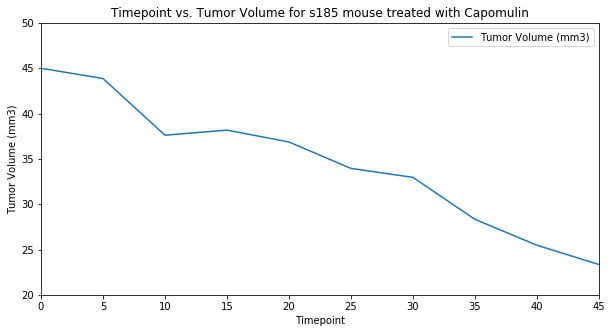

<Figure size 432x288 with 0 Axes>

In [123]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = metadata_studyresults.loc[(metadata_studyresults['Drug Regimen']=="Capomulin")] 
Capomulin_1mice_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="s185"]
Capomulin_LinePlot_df = Capomulin_1mice_df[["Timepoint","Tumor Volume (mm3)"]]
Capomulin_LinePlot_df = Capomulin_LinePlot_df.set_index("Timepoint")
Capomulin_LinePlot_df.plot(kind='line', figsize=(10,5))
plt.title("Timepoint vs. Tumor Volume for s185 mouse treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.ylim(20, 50)
plt.show()
plt.tight_layout()

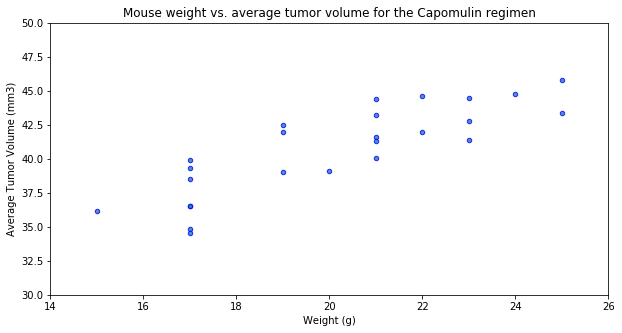

<Figure size 432x288 with 0 Axes>

In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_ScatPlot_TumVol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Capomulin_ScatPlot_Weight = Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
Capomulin_ScatPlot_df = pd.merge(Capomulin_ScatPlot_TumVol, Capomulin_ScatPlot_Weight, how='outer', on='Mouse ID')
Capomulin_ScatPlot_df

Capomulin_ScatPlot_df.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,5))
plt.title("Mouse weight vs. average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14, 26)
plt.ylim(30, 50)
plt.show()
plt.tight_layout()

# -------------------------------------------------------------------------------------------------------

# Capomulin_ScatPlot_df = Capomulin_df[["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]
# Capomulin_ScatPlot_df = Capomulin_ScatPlot_df.set_index("Mouse ID")
# Capomulin_ScatPlot_df.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", figsize=(10,5))
# # plt.title("Mouse weight vs. average tumor volume for the Capomulin regimen")
# # plt.xlabel("Weight (g)")
# # plt.ylabel("Average Tumor Volume (mm3)")
# # plt.xlim(14, 26)
# # plt.ylim(20, 50)
# # plt.show()
# # plt.tight_layout()

# # plt.scatter(x=x_axis, y=data, marker="o", facecolors="orange", edgecolors="blue", s=x_axis, alpha=0.8)

## Correlation and Regression

The correlation coefficient (r) is 0.84
The p-value is 1.322572243471279e-07
The r-squared is: 0.7088568047708717


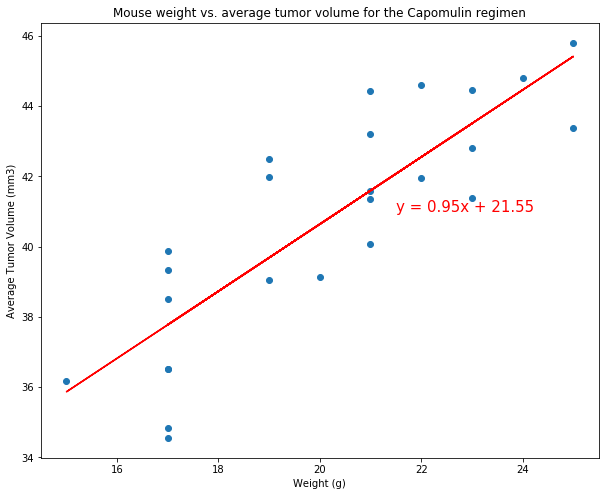

In [127]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Coeff_Regression_df_v0 = metadata_studyresults.loc[(metadata_studyresults['Drug Regimen']=="Capomulin")]
# # Coeff_Regression_df_v1 = Coeff_Regression_df_v0.groupby("Mouse ID")['Timepoint'].max()
# Coeff_Regression_df_v1 = Coeff_Regression_df_v0[Coeff_Regression_df_v0['Timepoint']==45]
# Coeff_Regression_df_v1

Capomulin_ScatPlot_df
#  Correlation coefficient
Weight = Capomulin_ScatPlot_df['Weight (g)']
Av_Tumor_size = Capomulin_ScatPlot_df['Tumor Volume (mm3)']
correlation = sts.pearsonr(Weight, Av_Tumor_size)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

#  linear regression model 

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Weight, Av_Tumor_size)

# Calculate the predictions for each value of x (# Rooms)
regression_values = Weight * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(Weight, Av_Tumor_size)

# Plot the regression line
plt.plot(Weight, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Mouse weight vs. average tumor volume for the Capomulin regimen")
plt.annotate(line_eq, (21.5, 41), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()